In [1]:
import networkx as nx
import random
import powerlaw
import matplotlib.pyplot as plt
import community

In [6]:
# Basic statistics
def basic_statistics(G):
    print('Nodes in G:', G.number_of_nodes())
    print('Edges in G:', G.number_of_edges())
    print('Is G connected?', nx.is_connected(G))
    if not nx.is_connected(G):
        print('Number of connected components in G:', nx.number_connected_components(G))
        print('What is the size of the giant component?', len(max(nx.connected_components(G), key=len)))

In [57]:
G = nx.read_weighted_edgelist('data/email-Enron.edges')
basic_statistics(G)

Nodes in G: 87273
Edges in G: 299220
Is G connected? False
Number of connected components in G: 1331
What is the size of the giant component? 84384


In [55]:
# processes the network
G.remove_edges_from(nx.selfloop_edges(G))
G_core = nx.k_core(G, k = 43)

basic_statistics(G_core)

Nodes in G: 1186
Edges in G: 51273
Is G connected? True


In [59]:
G_core_communities_louvain = community.best_partition(G_core)
print("Q:", community.modularity(G_core_communities_louvain, G_core))

def community_statistics(G, partition, N_comm):

    comm_sizes = {}
    for node, comm in partition.items():
        comm_sizes[comm] = comm_sizes.get(comm, 0) + 1
    
    sorted_comms = sorted(comm_sizes.items(), key=lambda x: x[1], reverse=True)
    
    for i in range(min(N_comm, len(sorted_comms))):
        comm_id, size = sorted_comms[i]
        nodes_in_comm = [node for node, comm in partition.items() if comm == comm_id]
        subgraph = G.subgraph(nodes_in_comm)
        density = nx.density(subgraph)
        print(f"Comm {i+1}: N = {size}, density = {density:.4f}")

community_statistics(G_core, G_core_communities_louvain, 10)

Q: 0.5359330254837624
Comm 1: N = 344, density = 0.1482
Comm 2: N = 217, density = 0.2878
Comm 3: N = 175, density = 0.2560
Comm 4: N = 167, density = 0.2391
Comm 5: N = 156, density = 0.3583
Comm 6: N = 127, density = 0.5557


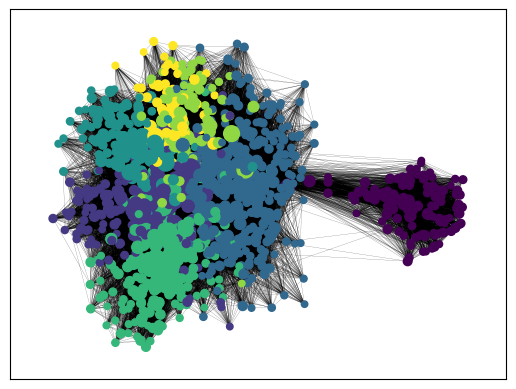

In [54]:
colors = [G_core_communities_louvain[n] for n in G_core.nodes()]
sizes = [0.5*G_core.degree(n) for n in G_core.nodes()]
nx.draw_networkx(G_core, pos = nx.spring_layout(G_core), node_color = colors, node_size = sizes, with_labels = False, width = 0.1)